# Final Project -- part 1: EDA

### Group: Toxic  
### Member: 
**Qingyi (Lexie) Sun**,  Model and EDA  
**Todd Zhang**,  EDA and Visualization

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from time import time
import datetime
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,KFold
import gc
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## EDA

In [3]:
data = pd.read_csv("train.csv")

In [4]:
test = pd.read_csv('data_for_test.csv')

In [135]:
data.head()

,patient_id,key,gender,age,x1,x2,x3,x4,x5,x6,xx1,xx2,xx3,xx4,xx5,y_mean_MAP,y_mean_HR
0,1891,1891-3,1,75,22,1,2,0,0,1,80.0,95.0,99.9,49.4,62.5,59.04,80.0
1,1891,1891-3,1,75,22,1,2,0,0,1,80.0,94.9,98.4,48.7,61.3,59.04,80.0
2,1891,1891-3,1,75,22,1,2,0,0,1,80.0,95.0,95.3,48.5,60.3,59.04,80.0
3,1891,1891-3,1,75,22,1,2,0,0,1,80.0,95.0,97.4,48.9,61.3,59.04,80.0
4,1891,1891-3,1,75,22,1,2,0,0,1,76.7,95.7,99.6,50.2,62.8,59.04,80.0


#### 👆no missing value.

In [7]:
data.describe(include='all')

,patient_id,key,gender,age,x1,x2,x3,x4,x5,x6,xx1,xx2,xx3,xx4,xx5,y_mean_MAP,y_mean_HR
count,1.348470e+06,1348470,1.348470e+06,1.348470e+06,1.348470e+06,1.348470e+06,1.348470e+06,1.348470e+06,1.348470e+06,1.348470e+06,1.348470e+06,1.348470e+06,1.348470e+06,1.348470e+06,1.348470e+06,1.348470e+06,1.348470e+06
unique,NaN,44949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2653-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.469837e+03,NaN,4.175176e-01,6.479960e+01,3.332670e+01,4.822577e+00,3.012303e+00,1.043850e-01,2.163563e-01,3.732230e-01,8.338725e+01,9.314891e+01,1.213985e+02,5.898525e+01,7.894375e+01,7.909662e+01,8.344642e+01
std,8.372619e+02,NaN,4.931499e-01,1.505399e+01,1.396050e+01,3.686292e+00,1.556848e+00,3.057594e-01,4.117601e-01,4.836608e-01,1.631827e+01,1.865803e+01,2.164184e+01,1.212996e+01,1.447734e+01,1.432882e+01,1.606510e+01
min,0.000000e+00,NaN,0.000000e+00,1.700000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.810000e+01,1.500000e+01,3.500000e+01,3.534333e+01,0.000000e+00
25%,7.240000e+02,NaN,0.000000e+00,5.700000e+01,2.400000e+01,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.200000e+01,9.500000e+01,1.060000e+02,5.080000e+01,6.896600e+01,6.905640e+01,7.209700e+01
50%,1.539000e+03,NaN,0.000000e+00,6.700000e+01,3.100000e+01,4.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.200000e+01,9.700000e+01,1.190000e+02,5.773400e+01,7.700000e+01,7.700000e+01,8.212020e+01
75%,2.201000e+03,NaN,1.000000e+00,7.700000e+01,4.200000e+01,7.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,9.356700e+01,9.900000e+01,1.348000e+02,6.579900e+01,8.700000e+01,8.718000e+01,9.346000e+01


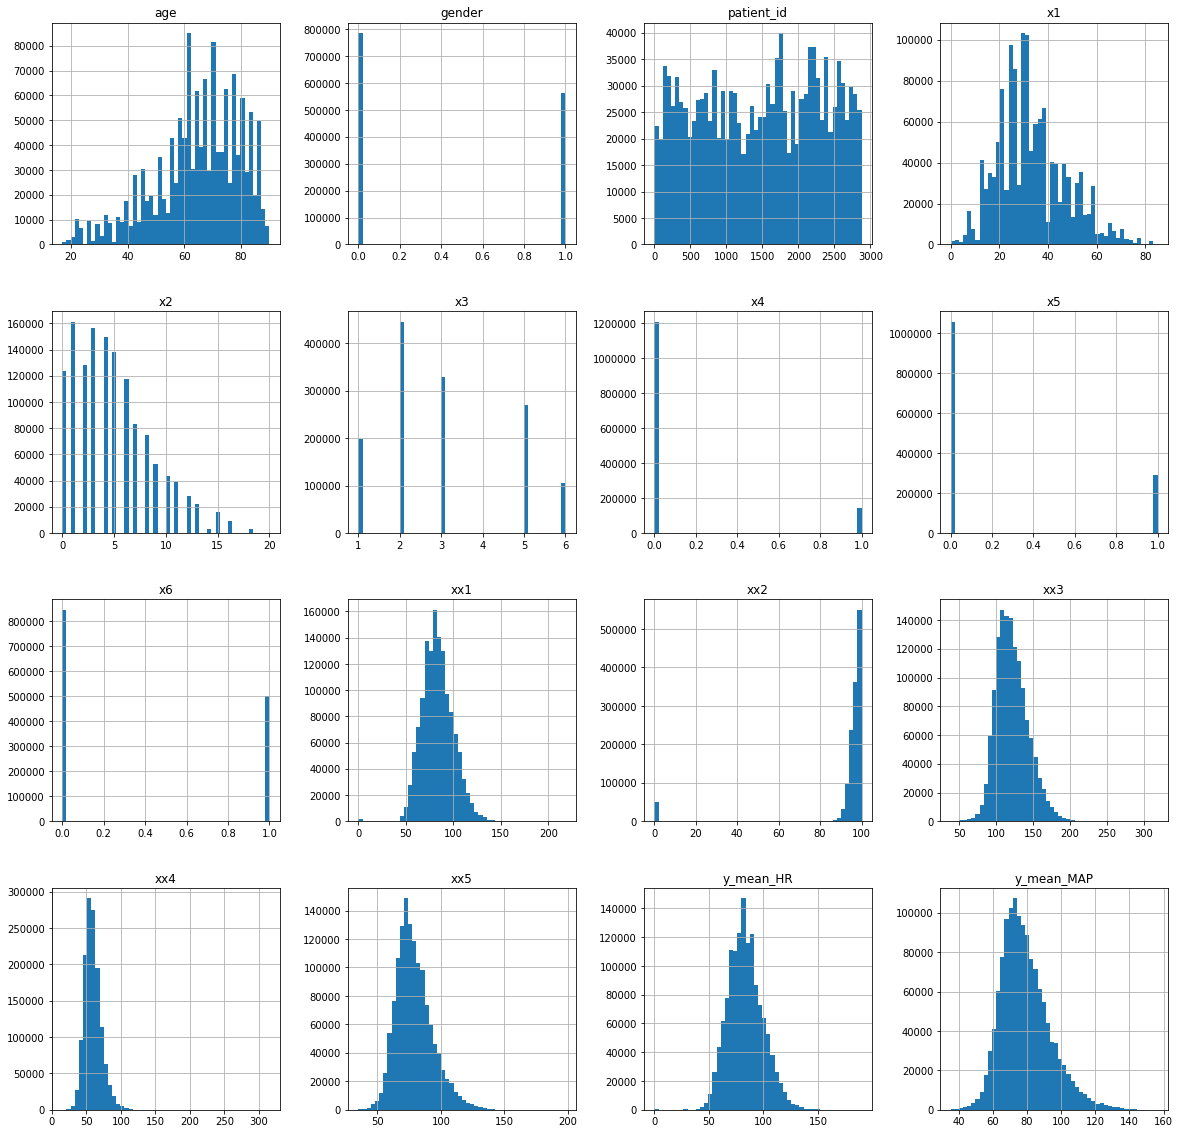

In [10]:
data.hist(bins=50, figsize=(20,20))
plt.show()

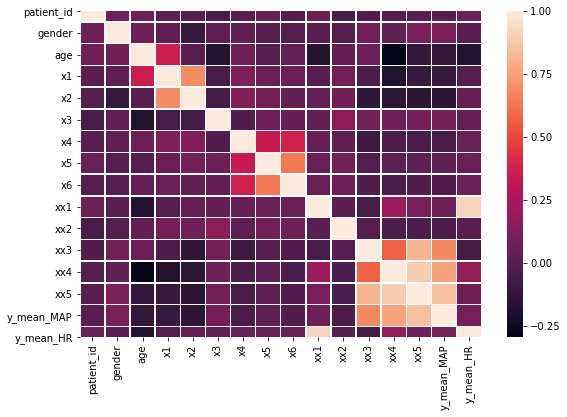

In [11]:
corr = data.corr()
# plot the correlation heatmap
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, 
            linewidths=.5, ax=ax)

Text(0, 0.5, 'y')

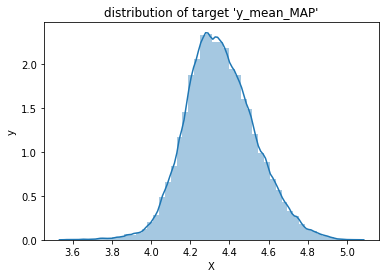

In [12]:
sns.distplot(np.log(data['y_mean_MAP']))
plt.title("distribution of target 'y_mean_MAP'")
plt.xlabel("X")
plt.ylabel("y")

👆 `y_mean_MAP` needs log transformation.